In [241]:
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
# import seaborn as sns
import numpy as np

In [2]:
raw = pd.read_csv("LOT4KG_May+5,+2025_00.04-recudedheader.csv")
print(raw.columns)
print(raw.shape)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'Q5.6#3_4_1', 'Q5.6#3_5_1', 'Q5.6#3_6_1', 'Q5.6#3_7_TEXT', 'Q5.6#3_7_1',
       'Q5.6.1', 'Q6.1', 'Q6.2', 'Q6.3', 'Unnamed: 384'],
      dtype='object', length=385)
(99, 385)


In [3]:
raw_cols = raw.dropna(thresh=3,axis=1)
# raw_cols.columns
print(raw_cols.shape)
raw_cols.columns

data = raw_cols.dropna(thresh=50)
print(data.shape)
print(data.columns)

(99, 382)
(42, 382)
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientFirstName',
       ...
       'Q5.6#3_3_1', 'Q5.6#3_4_1', 'Q5.6#3_5_1', 'Q5.6#3_6_1', 'Q5.6#3_7_TEXT',
       'Q5.6#3_7_1', 'Q5.6.1', 'Q6.1', 'Q6.2', 'Q6.3'],
      dtype='object', length=382)


In [4]:
data = raw.fillna("")
data=data[data["Progress"]>50]
data=data[data["Q1.1_1"].str.contains("@")]
print(data.shape)

(34, 385)


In [5]:
columns_tools = {
    'Q4.2#3_1_1': 'KG Implementation: data preparation',
    'Q4.2#3_2_1': 'KG Implementation: mapping generation',
    'Q4.2#3_3_1': 'KG Implementation: data transformation',
    'Q4.2#3_4_1': 'KG Implementation: constraint generation',
    'Q4.2#3_5_1': 'KG Implementation: data validation',
    'Q4.2#3_6_TEXT': 'KG Implementation: other task',
    'Q4.2#3_6_1': 'KG Implementation: other task comment',
    
    'Q4.3#3_1_1': 'KG publication: documentation',
    'Q4.3#3_2_1': 'KG publication: publication',
    'Q4.3#3_3_TEXT': 'KG publication: other task',
    'Q4.3#3_3_1': 'KG publication: other task comment',
    
    'Q4.4#3_1_1': 'KG maintenance: bug detection',
    'Q4.4#3_2_TEXT': 'KG maintenance: other task',
    'Q4.4#3_2_1': 'KG maintenance: other task comment',
    
    'Q5.2#3_1_1': 'Change analysis: conceptualisation',
    'Q5.2#3_2_1': 'Change analysis: evaluation',
    'Q5.2#3_3_TEXT': 'Change analysis: other task',
    'Q5.2#3_3_1': 'Change analysis: other task comment',
    
    'Q5.3#3_1_1': 'Onto update: change encoding',
    'Q5.3#3_2_1': 'Onto update: ontology evaluation',
    'Q5.3#3_3_1': 'Onto update: onto evaluation incremental',
    'Q5.3#3_4_TEXT': 'Onto update: other task',
    'Q5.3#3_4_1': 'Onto update: other task comment',
    
    'Q5.4#3_1_1': 'Impact assessment: delta detection',
    'Q5.4#3_2_1': 'Impact assessment: analysis',
    'Q5.4#3_3_TEXT': 'Impact assessment: other task',
    'Q5.4#3_3_1': 'Impact assessment: other task comment',
    
    'Q5.5#3_1_1': 'KG update onto: mappipngs update',
    'Q5.5#3_2_1': 'KG update onto: transformation incremental',
    'Q5.5#3_3_1': 'KG update onto: transformation',
    'Q5.5#3_4_1': 'KG update onto: constraints update',
    'Q5.5#3_5_1': 'KG update onto: validation incremental',
    'Q5.5#3_6_1': 'KG update onto: validation',
    'Q5.5#3_7_TEXT':'KG update onto: other task',
    'Q5.5#3_7_1': 'KG update onto: other task comment',
    
    'Q5.6#3_1_1': 'KG update data: mappipngs update',
    'Q5.6#3_2_1': 'KG update data: transformation incremental',
    'Q5.6#3_3_1': 'KG update data: transformation',
    'Q5.6#3_4_1': 'KG update data: constraints update',
    'Q5.6#3_5_1': 'KG update data: validation incremental',
    'Q5.6#3_6_1': 'KG update data: validation',
    'Q5.6#3_7_TEXT':'KG update data: other task',
    'Q5.6#3_7_1': 'KG update data: other task comment'
}

In [6]:
print(columns_tools.keys())

dict_keys(['Q4.2#3_1_1', 'Q4.2#3_2_1', 'Q4.2#3_3_1', 'Q4.2#3_4_1', 'Q4.2#3_5_1', 'Q4.2#3_6_TEXT', 'Q4.2#3_6_1', 'Q4.3#3_1_1', 'Q4.3#3_2_1', 'Q4.3#3_3_TEXT', 'Q4.3#3_3_1', 'Q4.4#3_1_1', 'Q4.4#3_2_TEXT', 'Q4.4#3_2_1', 'Q5.2#3_1_1', 'Q5.2#3_2_1', 'Q5.2#3_3_TEXT', 'Q5.2#3_3_1', 'Q5.3#3_1_1', 'Q5.3#3_2_1', 'Q5.3#3_3_1', 'Q5.3#3_4_TEXT', 'Q5.3#3_4_1', 'Q5.4#3_1_1', 'Q5.4#3_2_1', 'Q5.4#3_3_TEXT', 'Q5.4#3_3_1', 'Q5.5#3_1_1', 'Q5.5#3_2_1', 'Q5.5#3_3_1', 'Q5.5#3_4_1', 'Q5.5#3_5_1', 'Q5.5#3_6_1', 'Q5.5#3_7_TEXT', 'Q5.5#3_7_1', 'Q5.6#3_1_1', 'Q5.6#3_2_1', 'Q5.6#3_3_1', 'Q5.6#3_4_1', 'Q5.6#3_5_1', 'Q5.6#3_6_1', 'Q5.6#3_7_TEXT', 'Q5.6#3_7_1'])


In [7]:
tools = raw[columns_tools.keys()]
tools = tools.dropna()
tools = tools.transpose()
# tools.replace(to_replace="-99",value="")
tools.insert(0, "label", columns_tools.values())
# df['Year'].astype(str) + df['quarter']
cols = tools.columns[2:len(tools.columns)]
# print(tools.columns)
tools['tools'] = tools[cols].astype(str).agg(', '.join, axis=1)

tools = tools[['label','tools']]
tools['tools'] = tools['tools'].str.replace("\t","")
tools['tools'] = tools['tools'].str.replace("-99,","")
tools['tools'] = tools['tools'].str.replace("-99.0,","")
tools['tools'] = tools['tools'].str.replace("-99.0","")
tools['tools'] = tools['tools'].str.replace("-99","")
tools['tools'] = tools['tools'].str.replace("  ","")
# tools['tools'] = tools['tools'].str.replace(",",", ")
# tools['tools'] = tools['tools'].str.replace(", ","")
# print(tools)

tools.to_csv("tools_per_activity.csv")



/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


In [8]:
# columns_actors = columns.tools
data = data.drop(labels=columns_tools.keys(),axis=1)

In [384]:
# QX.X#1_X_1: Onto/KG Engineer
# QX.X#1_X_2: Domain Expert
# QX.X#1_X_3: Automated
# QX.X#1_X_4: LLM
# QX.X#1_X_5: Not Applicable
#             0, -99 --> Not Applicable

post = ['_1','_2','_3','_4','_5']

keys = {
    'Q4.2#1_1': 'KG Implementation: data preparation',
    'Q4.2#1_2': 'KG Implementation: mapping generation',
    'Q4.2#1_3': 'KG Implementation: data transformation',
    'Q4.2#1_4': 'KG Implementation: constraint generation',
    'Q4.2#1_5': 'KG Implementation: data validation',
    'Q4.2#1_6': 'KG Implementation: other task',
    
    'Q4.3#1_1': 'KG publication: documentation',
    'Q4.3#1_2': 'KG publication: publication',
    'Q4.3#1_3': 'KG publication: other task',
    
    'Q4.4#1_1': 'KG maintenance: bug detection',
    'Q4.4#1_2': 'KG maintenance: other task',
    
    'Q5.2#1_1': 'Change analysis: conceptualisation',
    'Q5.2#1_2': 'Change analysis: evaluation',
    'Q5.2#1_3': 'Change analysis: other task',
    
    'Q5.3#1_1': 'Onto update: change encoding',
    'Q5.3#1_2': 'Onto update: ontology evaluation',
    'Q5.3#1_3': 'Onto update: onto evaluation incremental',
    'Q5.3#1_4': 'Onto update: other task',
    
    'Q5.4#1_1': 'Impact assessment: delta detection',
    'Q5.4#1_2': 'Impact assessment: analysis',
    'Q5.4#1_3': 'Impact assessment: other task',
    
    'Q5.5#1_1': 'KG update onto: mappipngs update',
    'Q5.5#1_2': 'KG update onto: transformation incremental',
    'Q5.5#1_3': 'KG update onto: transformation',
    'Q5.5#1_4': 'KG update onto: constraints update',
    'Q5.5#1_5': 'KG update onto: validation incremental',
    'Q5.5#1_6': 'KG update onto: validation',
    'Q5.5#1_7': 'KG update onto: other task',
    
    'Q5.6#1_1': 'KG update data: mappipngs update',
    'Q5.6#1_2': 'KG update data: transformation incremental',
    'Q5.6#1_3': 'KG update data: transformation',
    'Q5.6#1_4': 'KG update data: constraints update',
    'Q5.6#1_5': 'KG update data: validation incremental',
    'Q5.6#1_6': 'KG update data: validation',
    'Q5.6#1_7': 'KG update data: other task',
    
    'Q5.5a6#1_1': 'KG update: mappipngs update',
    'Q5.5a6#1_2': 'KG update: transformation incremental',
    'Q5.5a6#1_3': 'KG update: transformation',
    'Q5.5a6#1_4': 'KG update: constraints update',
    'Q5.5a6#1_5': 'KG update: validation incremental',
    'Q5.5a6#1_6': 'KG update: validation',
    'Q5.5a6#1_7': 'KG update: other task',
}
    

In [11]:
# data[['Q5.5#1_1_1','Q5.5#1_1_2','Q5.5#1_1_5']]

responseids = [
    'R_2fDw06TIf64FGoq',
    'R_80O0KIhKwJggLim',
    'R_3ymGHQxelXfwfiF',
    'R_8GCBsru2z3sC4jO',
    'R_5EDOCXpxFOjA4ZH',
    'R_2PGZFxSlZDViOaQ',
    'R_8aEtQp82IKJQwxE',
    'R_8FICD82iLEryiDd',
    'R_8iL3RBg2n685uM1',
    'R_8V9gB4d4VUp4lkp',
    'R_278sa6hQ0rJOzAZ',
    'R_8dvW2dH98atfpHH',
    'R_8sbOtKo7zdqfW4s',
    'R_8n2PU8EXSe4x2pK',
    'R_5H7FczNoLz98n6h',
    'R_24OL1HTnOIrE9mF',
    'R_2yt96avhU5bRqlH',
    'R_2M3x7wcle1DXymp',
    'R_1DqhZnFTv46Og6t',
    'R_21hYaUUq9njPW89',
    'R_7P4AnyKEhkp0ay4',
    'R_7kFbBbrWdLtSwnS',
    'R_2G9sXWtdcLTNq15',
    'R_25HPmRsSNZCrEew',
    'R_8wW3TaLkMwvC5fr',
    'R_2IGyRmgeAE78AKu',
    'R_8qjS4dRfn3Bs3mg',
    'R_4zBxYWYOPXMA1tQ',
    'R_2QXa3qEGacM8vG5',
    'R_1pPKudrF5m4TrUz',
    'R_1L1LQkiVljjvqr7',
    'R_37AWw7A7QLZEQ6t',
    'R_8liYkfcw4h1HSoB',
    'R_8IAb6TkoD3gFo0T'
    
]
data = data.drop(labels=columns_tools.keys(),axis=1)
# data['ResponseId'] == responseids
# responseids == data['ResponseId']

TypeError: unhashable type: 'dict_keys'

## Ontology Engineering

In [263]:
ontoeng_cols = ['ResponseId',
    # usecases, purpose/scope, cqs, diferent way, other
    'Q3.2_1','Q3.2_2','Q3.2_3', #'Q3.2_4', #'Q3.2_5', #req. engineering
    # reuse, conceptuatization, encoding, evaluation, other
    'Q3.2_6','Q3.2_7','Q3.2_8','Q3.2_9', #'Q3.2_10', #ontology engineering
    # documentation, publication, other
    'Q3.2_11','Q3.2_12', #'Q3.2_13', #ontology publication
    # bug detection, new requirements, other
    'Q3.2_14','Q3.2_15', #'Q3.2_16'
               ]


In [517]:
ontoeng = data[ontoeng_cols]
ontoeng['sum'] = ontoeng.drop(labels=['ResponseId'],axis=1).sum(axis=1)
indexdrop = ontoeng[ (ontoeng.sum(axis=1)<-150) ].index
# print(indexdrop)
ontoeng = ontoeng.drop(labels=indexdrop,axis=0)
ontoeng = ontoeng.replace(to_replace=-99,value=0.0)
ontoeng['sum'] = None

ontoeng['sum'] = ontoeng.drop(labels=['ResponseId'],axis=1).sum(axis=1)
ontoeng['ontoeng_total'] = ontoeng['sum'] / 12
ontoeng['req'] = ontoeng[['Q3.2_1','Q3.2_2','Q3.2_3']].sum(axis=1) / 3
ontoeng['enc'] = ontoeng[['Q3.2_6','Q3.2_7','Q3.2_8','Q3.2_9']].sum(axis=1) / 4
ontoeng['pub'] = ontoeng[['Q3.2_11','Q3.2_12']].sum(axis=1) / 2
ontoeng['man'] = ontoeng[['Q3.2_14','Q3.2_15']].sum(axis=1) / 2

ontoeng['lot_a1'] = np.ceil(ontoeng[['Q3.2_1','Q3.2_2','Q3.2_3']].sum(axis=1) / 3)
ontoeng['lot_a2'] = np.ceil(ontoeng[['Q3.2_6','Q3.2_7','Q3.2_8','Q3.2_9']].sum(axis=1) / 4)
ontoeng['lot_a3'] = np.ceil(ontoeng[['Q3.2_11','Q3.2_12']].sum(axis=1) / 2)
ontoeng['lot_a4'] = np.ceil(ontoeng[['Q3.2_14','Q3.2_15']].sum(axis=1) / 2)

ontoeng.drop(labels=[96],inplace=True)
count = ontoeng[['ResponseId']].count().iloc[0]
# count
ontoeng_sum = ontoeng.drop(labels=['ResponseId','sum','ontoeng_total','req','enc','pub','man'],axis=1).sum().to_frame(name='data')
ontoeng_sum['ratio'] = ontoeng_sum['data']/count
ontoeng_sum.transpose()

ontoeng = pd.concat([ontoeng,ontoeng_sum.transpose()])

####################
final_cols_lot = ['ResponseId','lot_a1','lot_a2','lot_a3','lot_a4']
ontoeng_sum = ontoeng[final_cols_lot]

/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [518]:
ontoeng_sum

,ResponseId,lot_a1,lot_a2,lot_a3,lot_a4
3,R_2fDw06TIf64FGoq,1.0000,1.0000,0.00000,1.00000
5,R_3ymGHQxelXfwfiF,1.0000,1.0000,1.00000,1.00000
6,R_8GCBsru2z3sC4jO,1.0000,1.0000,1.00000,1.00000
8,R_5EDOCXpxFOjA4ZH,1.0000,1.0000,1.00000,1.00000
9,R_2PGZFxSlZDViOaQ,1.0000,1.0000,1.00000,1.00000
10,R_8aEtQp82IKJQwxE,1.0000,0.0000,0.00000,0.00000
11,R_8FICD82iLEryiDd,1.0000,1.0000,1.00000,1.00000
12,R_8iL3RBg2n685uM1,1.0000,1.0000,1.00000,1.00000
13,R_8V9gB4d4VUp4lkp,1.0000,1.0000,0.00000,0.00000
14,R_278sa6hQ0rJOzAZ,1.0000,1.0000,1.00000,0.00000


## Knowledge Graph Construction

In [519]:
kgc_columns = [
    'Q4.2#1_1_1','Q4.2#1_1_2', #'Q4.2#1_1_3','Q4.2#1_1_4',
               'Q4.2#1_1_5',
    'Q4.2#1_2_1','Q4.2#1_2_2', #'Q4.2#1_2_3','Q4.2#1_2_4',
               'Q4.2#1_2_5',
    'Q4.2#1_3_1','Q4.2#1_3_2', #'Q4.2#1_3_3','Q4.2#1_3_4',
               'Q4.2#1_3_5',
    'Q4.2#1_4_1','Q4.2#1_4_2', #'Q4.2#1_4_3','Q4.2#1_4_4',
               'Q4.2#1_4_5',
    'Q4.2#1_5_1','Q4.2#1_5_2', #'Q4.2#1_5_3','Q4.2#1_5_4',
               'Q4.2#1_5_5',
# ]
# kg_pub_maintance_columns = [
    'Q4.3#1_1_1','Q4.3#1_1_2', #'Q4.3#1_1_3','Q4.3#1_1_4',
               'Q4.3#1_1_5',
    'Q4.3#1_2_1','Q4.3#1_2_2', #'Q4.3#1_2_3','Q4.3#1_2_4',
               'Q4.3#1_2_5',
    'Q4.4#1_1_1','Q4.4#1_1_2', #'Q4.4#1_1_3','Q4.4#1_1_4',
               'Q4.4#1_1_5',
#     'Q4.4#1_2_1','Q4.4#1_2_2', #'Q4.4#1_2_3','Q4.4#1_2_4',
#                'Q4.4#1_2_5'
]

evolution_columns = ['ResponseId',
        
    'Q5.2#1_1_1','Q5.2#1_1_2', #'Q5.2#1_1_3','Q5.2#1_1_4',
                     'Q5.2#1_1_5',
    'Q5.2#1_2_1','Q5.2#1_2_2', #'Q5.2#1_2_3','Q5.2#1_2_4',
                     'Q5.2#1_2_5',
    'Q5.3#1_1_1','Q5.3#1_1_2', #'Q5.3#1_1_3','Q5.3#1_1_4',
                     'Q5.3#1_1_5',
    'Q5.3#1_2_1','Q5.3#1_2_2', #'Q5.3#1_2_3','Q5.3#1_2_4',
                     'Q5.3#1_2_5',
#     'Q5.3#1_3_1','Q5.3#1_3_2','Q5.3#1_3_3','Q5.3#1_3_4','Q5.3#1_3_5', #evaluation incremental
# ]
# kg_evolution_columns = [

    'Q5.4#1_1_1','Q5.4#1_1_2', #'Q5.2#1_1_3','Q5.2#1_1_4',
                     'Q5.4#1_1_5',
    'Q5.4#1_2_1','Q5.4#1_2_2', #'Q5.2#1_2_3','Q5.2#1_2_4',
                     'Q5.4#1_2_5',
                     
    'Q5.5#1_1_1','Q5.5#1_1_2', #'Q5.5#1_1_3','Q5.5#1_1_4',
                     'Q5.5#1_1_5',
#     'Q5.5#1_2_1','Q5.5#1_2_2','Q5.5#1_2_3','Q5.5#1_2_4','Q5.5#1_2_5', #incremental data update
    'Q5.5#1_3_1','Q5.5#1_3_2', #'Q5.5#1_3_3','Q5.5#1_3_4',
                     'Q5.5#1_3_5',
    'Q5.5#1_4_1','Q5.5#1_4_2', #'Q5.5#1_4_3','Q5.5#1_4_4',
                     'Q5.5#1_4_5',
#     'Q5.5#1_5_1','Q5.5#1_5_2','Q5.5#1_5_3','Q5.5#1_5_4','Q5.5#1_5_5', #incremental validation
    'Q5.5#1_6_1','Q5.5#1_6_2', #'Q5.5#1_6_3','Q5.5#1_6_4',
                     'Q5.5#1_6_5',
    
    'Q5.6#1_1_1','Q5.6#1_1_2', #'Q5.5#1_1_3','Q5.5#1_1_4',
                     'Q5.6#1_1_5',
#     'Q5.5#1_2_1','Q5.5#1_2_2','Q5.5#1_2_3','Q5.5#1_2_4','Q5.5#1_2_5', #incremental data update
    'Q5.6#1_3_1','Q5.6#1_3_2', #'Q5.5#1_3_3','Q5.5#1_3_4',
                     'Q5.6#1_3_5',
    'Q5.6#1_4_1','Q5.6#1_4_2', #'Q5.5#1_4_3','Q5.5#1_4_4',
                     'Q5.6#1_4_5',
#     'Q5.5#1_5_1','Q5.5#1_5_2','Q5.5#1_5_3','Q5.5#1_5_4','Q5.5#1_5_5', #incremental validation
    'Q5.6#1_6_1','Q5.6#1_6_2', #'Q5.5#1_6_3','Q5.5#1_6_4',
                     'Q5.6#1_6_5',
]

In [520]:
def select_and_clean(dat,cols):
    
    df = dat[cols]
    df.fillna(0.0)
    df.replace(to_replace='',value=0.0,inplace=True)
    for col in cols:
        if col == 'ResponseId':
            pass
        else:
            df[col] = df[col].astype(float)


#     df['sum'] = df.drop(labels=['ResponseId'],axis=1).sum(axis=1)
    indexdrop = df[df.drop(labels=['ResponseId'],axis=1).sum(axis=1) <= (len(cols)-5)*-99].index
    df = df.drop(labels=indexdrop,axis=0)
    df = df.replace(to_replace=-99,value=0.0)
#     df['sum'] = None
# kgc_data['sum'] = kgc_data.drop(labels=['ResponseId'],axis=1).sum(axis=1)
    return df

# kgc_data = select_and_clean(data,kgc_columns)
# evo_data = select_and_clean(data,evolution_columns)
lot4kg_data = select_and_clean(data,kgc_columns+evolution_columns)

/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
## combine xxx_1 and xxx_2 as a sum
## if _1+_2 == 0 --> _5 = 1.0
## if _1+_2+_5 == 0 --> no answer (make a new one _6 for no answer)

## check that all _1+_2 are not equal _5, or larger than _5 if _5 is not 0

## count each column - _1+_2 and _5 and _6 should add up to 100%


In [521]:
aggcols = ['ResponseId']
cols = lot4kg_data.columns
for col in cols:
        if col == 'ResponseId':
            pass
        else:
            lot4kg_data[col] = lot4kg_data[col].astype(bool)
            
for col in lot4kg_data.columns:
    if col.endswith("_2"):
        colnew = col[0:8]
        colna = colnew + "_na"
        col5 = colnew + "_5"
        col1 = colnew+ "_1"
        if (col.startswith("Q5.5#") or col.startswith("Q5.6#")):
            pass
        else:
            aggcols = aggcols + [colnew]
        
#         print(col, colnew, colna, col5)
        
        lot4kg_data[colnew] = lot4kg_data[col] | lot4kg_data[col1]
    
        if col.startswith("Q5.6"):
            cola = colnew.replace("Q5.6","Q5.5a6")
            lot4kg_data[cola] = lot4kg_data[colnew] | lot4kg_data[colnew.replace("Q5.6","Q5.5")]
            aggcols = aggcols + [cola]

#         kgc_data[col.replace("_2","_na")] = kgc_

lot4kg_data.drop(labels=[96],inplace=True)
lot4kg_data[aggcols]

,ResponseId,Q4.2#1_1,Q4.2#1_2,Q4.2#1_3,Q4.2#1_4,Q4.2#1_5,Q4.3#1_1,Q4.3#1_2,Q4.4#1_1,Q5.2#1_1,Q5.2#1_2,Q5.3#1_1,Q5.3#1_2,Q5.4#1_1,Q5.4#1_2,Q5.5a6#1_1,Q5.5a6#1_3,Q5.5a6#1_4,Q5.5a6#1_6
3,R_2fDw06TIf64FGoq,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True
5,R_3ymGHQxelXfwfiF,True,False,False,False,False,True,True,False,True,False,True,True,False,False,True,True,True,True
6,R_8GCBsru2z3sC4jO,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,R_5EDOCXpxFOjA4ZH,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
9,R_2PGZFxSlZDViOaQ,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
10,R_8aEtQp82IKJQwxE,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
11,R_8FICD82iLEryiDd,True,True,True,False,True,True,True,True,True,True,False,False,False,True,True,False,True,True
12,R_8iL3RBg2n685uM1,False,True,True,False,False,True,True,False,True,True,True,True,False,False,True,True,False,False
13,R_8V9gB4d4VUp4lkp,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
14,R_278sa6hQ0rJOzAZ,True,True,True,False,True,True,True,True,True,False,False,False,False,False,True,True,False,False


In [522]:

sum_data = lot4kg_data[aggcols].drop(labels=['ResponseId'],axis=1).sum().to_frame(name='sum')
sum_data['ratio']=sum_data['sum']/31
sum_data['name']=None

for index in sum_data.index:
    sum_data.loc[index,'name'] = keys[index]
#     print(index,keys[index])

In [523]:
lot4kg_sumdata = sum_data.drop_duplicates()
lot4kg_sumdata.columns = ['data','ratio','label']
lot4kg_sumdata = lot4kg_sumdata.transpose()
lot4kg_sumdata

,Q4.2#1_1,Q4.2#1_2,Q4.2#1_3,Q4.2#1_4,Q4.2#1_5,Q4.3#1_1,Q4.3#1_2,Q4.4#1_1,Q5.2#1_1,Q5.2#1_2,Q5.3#1_1,Q5.3#1_2,Q5.4#1_1,Q5.4#1_2,Q5.5a6#1_1,Q5.5a6#1_3,Q5.5a6#1_4,Q5.5a6#1_6
data,27,29,23,18,26,24,26,20,24,17,19,15,5,11,26,21,14,17
ratio,0.870968,0.935484,0.741935,0.580645,0.83871,0.774194,0.83871,0.645161,0.774194,0.548387,0.612903,0.483871,0.16129,0.354839,0.83871,0.677419,0.451613,0.548387
label,KG Implementation: data preparation,KG Implementation: mapping generation,KG Implementation: data transformation,KG Implementation: constraint generation,KG Implementation: data validation,KG publication: documentation,KG publication: publication,KG maintenance: bug detection,Change analysis: conceptualisation,Change analysis: evaluation,Onto update: change encoding,Onto update: ontology evaluation,Impact assessment: delta detection,Impact assessment: analysis,KG update: mappipngs update,KG update: transformation,KG update: constraints update,KG update: validation


In [524]:
finalcols = lot4kg_sumdata.columns
finalcols = finalcols.insert(0,'ResponseId')
# print(finalcols)
lot4kg = lot4kg_data[finalcols]

# lot4kg_data = lot4kg_data.set_index('ResponseId')
# lot4kg_data
lot4kg = pd.concat([lot4kg,lot4kg_sumdata])
lot4kg

,ResponseId,Q4.2#1_1,Q4.2#1_2,Q4.2#1_3,Q4.2#1_4,Q4.2#1_5,Q4.3#1_1,Q4.3#1_2,Q4.4#1_1,Q5.2#1_1,Q5.2#1_2,Q5.3#1_1,Q5.3#1_2,Q5.4#1_1,Q5.4#1_2,Q5.5a6#1_1,Q5.5a6#1_3,Q5.5a6#1_4,Q5.5a6#1_6
3,R_2fDw06TIf64FGoq,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True
5,R_3ymGHQxelXfwfiF,True,False,False,False,False,True,True,False,True,False,True,True,False,False,True,True,True,True
6,R_8GCBsru2z3sC4jO,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,R_5EDOCXpxFOjA4ZH,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
9,R_2PGZFxSlZDViOaQ,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
10,R_8aEtQp82IKJQwxE,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
11,R_8FICD82iLEryiDd,True,True,True,False,True,True,True,True,True,True,False,False,False,True,True,False,True,True
12,R_8iL3RBg2n685uM1,False,True,True,False,False,True,True,False,True,True,True,True,False,False,True,True,False,False
13,R_8V9gB4d4VUp4lkp,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
14,R_278sa6hQ0rJOzAZ,True,True,True,False,True,True,True,True,True,False,False,False,False,False,True,True,False,False


In [545]:
processed_results = lot4kg.join(ontoeng_sum.drop(labels='ResponseId',axis=1))
processed_results.replace(to_replace=float(1),value=True,inplace=True)
processed_results.replace(to_replace=float(0),value=False,inplace=True)

# print(processed_results.columns)
ordered_cols = ['ResponseId', 
                'lot_a1', 'lot_a2', 'lot_a3', 'lot_a4', 'Q5.2#1_1', 'Q5.2#1_2', 'Q5.3#1_1', 'Q5.3#1_2',
                'Q4.2#1_1', 'Q4.2#1_2', 'Q4.2#1_3', 'Q4.2#1_4','Q4.2#1_5', 'Q4.3#1_1', 'Q4.3#1_2', 'Q4.4#1_1', 'Q5.4#1_1', 'Q5.4#1_2',
               'Q5.5a6#1_1', 'Q5.5a6#1_3', 'Q5.5a6#1_4', 'Q5.5a6#1_6']

processed_results = processed_results[ordered_cols]
# processed_results.to_csv("processed_results.csv")

In [546]:
## To latex preparation
processed_results.replace(to_replace=True,value='yes ',inplace=True)
processed_results.replace(to_replace=False,value=pd.NA,inplace=True)
processed_results.drop(labels=['data','label'],inplace=True)
processed_results.drop(labels=['ResponseId'],axis=1,inplace=True)
to_appear_first = ['ratio']
new_index_order = [*to_appear_first, *processed_results.index.difference(to_appear_first)]
processed_results = processed_results.loc[new_index_order]

In [527]:
# processed_results.to_latex(buf='processed_results.tex')

In [557]:
## Add KG reference and sharing info

kgref = raw[['ResponseId','Q2.1','Q2.5']]
kgref.dropna(inplace=True)
kgref.replace(to_replace=1.0,value=True,inplace=True)
kgref.replace(to_replace=2.0,value=False,inplace=True)
kgref[['Q2.5']] = kgref[['Q2.5']].replace(to_replace=-99.0,value=True)
# kgref[['Q2.5']].replace(to_replace=-99,value=True,inplace=True)
# kgref[['Q2.1']].replace(to_replace=-99.0,value="",inplace=True)
# kgref[['Q2.1']] = kgref[['Q2.1']].replace(to_replace=-99,value="",inplace=True)
# kgref.sum()

processed_results_kgref = processed_results.join(kgref.drop(labels=['ResponseId'],axis=1))
processed_results_kgref['order'] = processed_results_kgref.drop(labels=['Q2.1','Q2.5'],axis=1).count(axis=1)
processed_results_kgref.sort_values(by='order',ascending=False,inplace=True)
processed_results_kgref.replace(to_replace=pd.NA,value='',inplace=True)

ordered_cols = ['Q2.5','Q2.1',
                'lot_a1', 'lot_a2', 'lot_a3', 'lot_a4', 'Q5.2#1_1', 'Q5.2#1_2', 'Q5.3#1_1', 'Q5.3#1_2',
                'Q4.2#1_1', 'Q4.2#1_2', 'Q4.2#1_3', 'Q4.2#1_4','Q4.2#1_5', 'Q4.3#1_1', 'Q4.3#1_2', 'Q4.4#1_1', 'Q5.4#1_1', 'Q5.4#1_2',
               'Q5.5a6#1_1', 'Q5.5a6#1_3', 'Q5.5a6#1_4', 'Q5.5a6#1_6']

processed_results_kgref = processed_results_kgref.drop(labels='order',axis=1)[ordered_cols]
processed_results_kgref.to_latex(buf='processed_results.tex')
processed_results_kgref.to_csv("processed_results.csv")


/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# col_queryinother = 'Q2.2_3_TEXT'

In [560]:
drop_cols = ['StartDate','EndDate','Status','IPAddress','RecordedDate',
             'RecipientLastName','RecipientFirstName',
             'RecipientEmail','ExternalReference','LocationLatitude',
             'LocationLongitude','DistributionChannel','UserLanguage',
             'Q1.1_1','Q1.1_2','Q1.1_3','Q1.2_5_TEXT',
             'Q6.2','Q6.3'
            ]
anonym_data = data.drop(labels=drop_cols,axis=1)
anonym_data.to_csv("anonymised_raw_survey_responses.csv")



## Knowledge Graph Purpose - only those that consented to have the info shared

In [561]:
# for key in keys.keys():
#     count = 0
#     notapplicable = 0
#     for p in post:
#         if data

anonym_kg = [22,38,84,97]
############################# KG purpose
kgpurpose_cols = ['ResponseId',
    'Q2.2_1','Q2.2_2','Q2.2_3','Q2.2_15','Q2.2_16','Q2.2_4','Q2.2_5','Q2.2_6','Q2.2_7','Q2.2_8','Q2.2_17','Q2.2_9',
    'Q2.2_10','Q2.2_11','Q2.2_12','Q2.2_13','Q2.2_14','Q2.2_18' 
]

In [585]:
kgpurpose = data[kgpurpose_cols]
# kgpurpose = kgpurpose[kgpurpose['Q2.5']<2.0]


kgpurpose = kgpurpose.drop(labels=anonym_kg)
# kg_purpose.shape
to_keep = kgpurpose[['ResponseId']].join(processed_results[['lot_a1']], how='inner').index
kgpurpose = kgpurpose.loc[to_keep,:]
kgpurpose.shape

# kgpurpose['Q2.5'].replace(to_replace = -99.0, value = 1.0, inplace = True)
kgpurpose.replace(to_replace = -99.0, value = 0.0, inplace = True)
kgpurpose.replace(to_replace = "", value = 0.0, inplace = True)
# kgpurpose = kgpurpose.drop(labels=['Q2.5'],axis=1)

In [586]:
kgpurpose_agg = kgpurpose.drop(labels=['ResponseId'],axis=1).sum().to_frame(name='data')
# kgpurpose_agg
kgpurpose_hist = kgpurpose.sum(axis=1)
kgpurpose_hist 


/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


3      7.0
5      6.0
6      9.0
8      3.0
9      8.0
10     4.0
11     5.0
12     4.0
13     4.0
14     6.0
15     2.0
16     8.0
17     3.0
18     0.0
20     1.0
21     7.0
27     3.0
31     4.0
35     5.0
60     6.0
61     4.0
73     6.0
75     4.0
77     8.0
91    10.0
93    10.0
95     5.0
dtype: float64

In [587]:
color1='#FFC300'
color2='#E10013'
color3='#0022FF'
color4='#00C52E'
colorg='grey'

kgpurpose_add = {'label':['Search',
'Exploration',
'Other',
'KG Completion',
'KG Validation',
'Creation of\n new knowledge',
'Other',
'Recommender\n System',
'KG Completion,\n Link Prediction',
'Question\n Answering',
'Anomaly\n Detection',
'Other',
'Recommender\n System',
'Search',
'Decision\n Support',
'Exploration',
'Other',
'None'],
'group':[
    'Reference/Querying','_Reference/Querying','_Reference/Querying',
    'Inference','_Inference','_Inference','_Inference',
    'ML Research Task','_ML Research Task','_ML Research Task','_ML Research Task','_ML Research Task',
    'User-facing Task','_User-facing Task','_User-facing Task','_User-facing Task','_User-facing Task','None'],
'color':[
    color1,color1,color1,
    color2,color2,color2,color2,
    color3,color3,color3,color3,color3,
    color4,color4,color4,color4,color4,
    colorg
],
'hatch':['////','////','////',
        '----','----','----','----',
        '...','...','...','...','...',
        'xxxx','xxxx','xxxx','xxxx','xxxx','']
}
groups=['Reference/Querying','Inference','ML Research Task','User-facing Task','None']

kgpurpose_agg['label'] = kgpurpose_add['label']
kgpurpose_agg['group'] = kgpurpose_add['group']
kgpurpose_agg['color'] = kgpurpose_add['color']
kgpurpose_agg['hatch'] = kgpurpose_add['hatch']
# kgpurpose_agg['index'] = kgpurpose_add.index()
kg_purpose_agg = kgpurpose_agg.reset_index()

kg_purpose_agg

kgpurpose_hist = kgpurpose.sum(axis=1)

# kgpurpose_agg.plot.bar(y='data',label=None)
# plt.bar()

/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


/home/romi/miniconda3/envs/ontovis/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


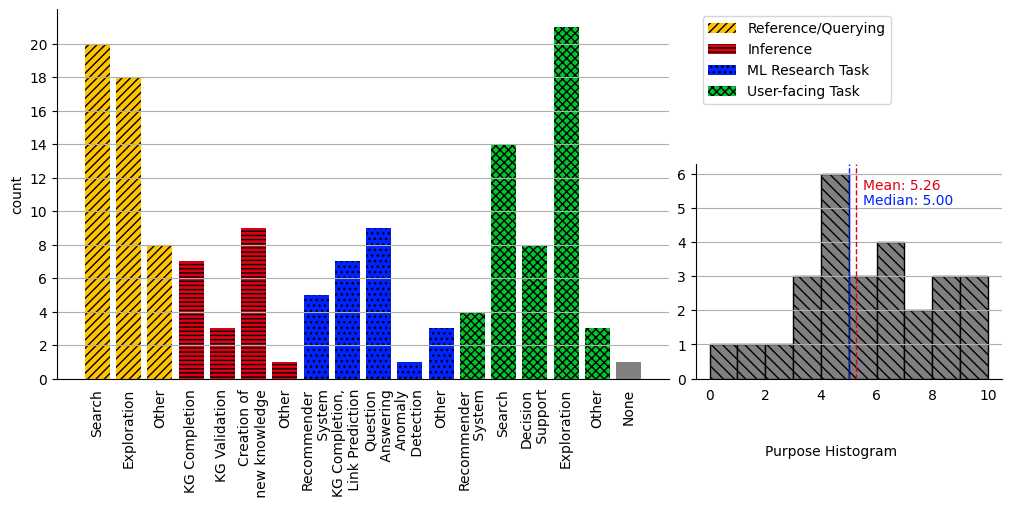

In [598]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mosaic = """
    AAAAAABBB
    AAAAAABBB
    AAAAAACCC
    AAAAAACCC
    AAAAAACCC
    """
fig = plt.figure(layout="constrained",figsize=(10, 5))
ax = fig.subplot_mosaic(mosaic)

ax['A'].spines['top'].set_visible(False) 
ax['A'].spines['right'].set_visible(False) 
ax['A'].tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=True) 


ax['A'].grid(axis='y')
ax['A'].bar(kgpurpose_agg.index, kgpurpose_agg['data'],color=kgpurpose_agg['color'],hatch=kgpurpose_agg['hatch'],alpha=1)

ax['A'].set_ylabel('count')
ax['A'].set_xticklabels(kgpurpose_agg['label'],rotation=90,va='top',ha='center',ma='right')
ax['A'].yaxis.set_ticks(np.arange(0, 21, 2))


yellow_patch = mpatches.Patch(facecolor=color1,hatch='////',alpha=1, label='Reference/Querying')
blue_patch = mpatches.Patch(facecolor=color2,hatch='----',alpha=1, label='Inference')
green_patch = mpatches.Patch(facecolor=color3,hatch='...',alpha=1, label='ML Research Task')
orange_patch = mpatches.Patch(facecolor=color4,hatch='xxxx',alpha=1, label='User-facing Task')
ax['B'].legend(handles=[yellow_patch,blue_patch,green_patch,orange_patch],loc='upper left')
ax['B'].spines['right'].set_visible(False) 
ax['B'].spines['left'].set_visible(False) 
ax['B'].spines['top'].set_visible(False) 
ax['B'].spines['bottom'].set_visible(False) 
ax['B'].tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False)
ax['B'].tick_params(axis='y', which='both', left=False, 
                right=False, labelleft=False)



ax['C'].grid(axis='y')
ax['C'].hist(kgpurpose_hist,color=colorg,edgecolor='black', hatch='\\\\\\',alpha=1)
ax['C'].text(2,-2.25,'Purpose Histogram')

min_ylim, max_ylim = plt.ylim()
ax['C'].axvline(kgpurpose_hist.mean(), color=color2, linestyle='dashed', linewidth=1)
ax['C'].text(kgpurpose_hist.mean()*1.05, max_ylim*0.88, 'Mean: {:.2f}'.format(kgpurpose_hist.mean()),color=color2)
ax['C'].axvline(kgpurpose_hist.median(), color=color3, linestyle='dashed', linewidth=1)
ax['C'].text(kgpurpose_hist.median()*1.1, max_ylim*0.81, 'Median: {:.2f}'.format(kgpurpose_hist.median()),color=color3)

ax['C'].spines['top'].set_visible(False) 
ax['C'].spines['right'].set_visible(False) 
ax['C'].tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=True) 

plt.savefig("figures/KG_purpose.png",dpi=600,format='png',bbox_inches='tight',transparent=True)
plt.show()

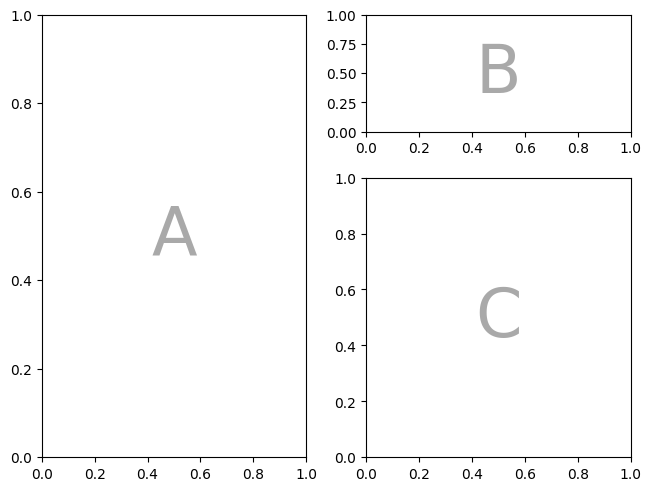

In [179]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)


mosaic = """
    AB
    AC
    AC
    """
fig = plt.figure(layout="constrained")
ax = fig.subplot_mosaic(mosaic)
identify_axes(ax)